In [42]:
using CSV, DataFrames
using Plots,StatsPlots
using Statistics, StatsBase
using LsqFit
using SpecialFunctions

# Wczytanie danych i odrzucenie odstających

In [43]:
data=CSV.read("diamonds.csv", DataFrame);
data[:,:V]=data[:,:x] .* data[:,:y] .* data[:,:z];

In [44]:
qpₘᵢₙ,qpₘₐₓ=quantile(data[:,:price], 0.01),quantile(data[:,:price],0.90);
qvₘᵢₙ,qvₘₐₓ=quantile(data[:,:V], 0.01),quantile(data[:,:V], 0.95);

In [45]:
data_clean=data[((data[:, :V].<qvₘₐₓ) .& (data[:, :V].>qvₘᵢₙ)) .& ((data[:, :price].<qpₘₐₓ) .& (data[:, :price].>qpₘᵢₙ)), [:V,:price]];

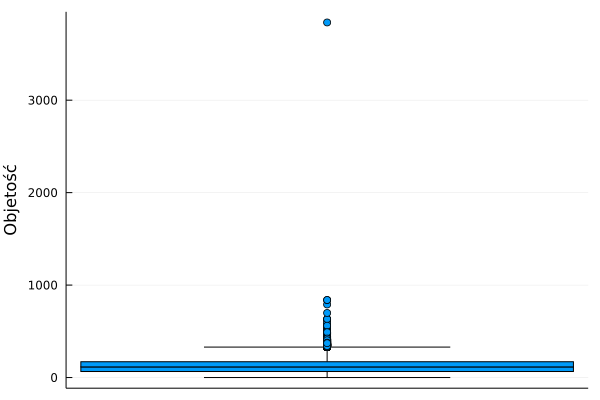

In [46]:
boxplot(data[:,:V], ylab = "Objetość",xaxis=nothing,legend=false)


In [47]:
savefig("imgs/boxplot_V_danych.pdf");

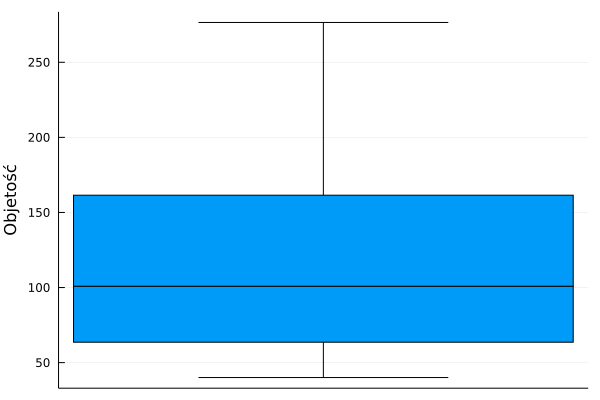

In [48]:
boxplot(data_clean[:,:V], ylab = "Objetość",xaxis=nothing,legend=false)

In [49]:
savefig("imgs/boxplot_V_danych_oczyszczonych.pdf");

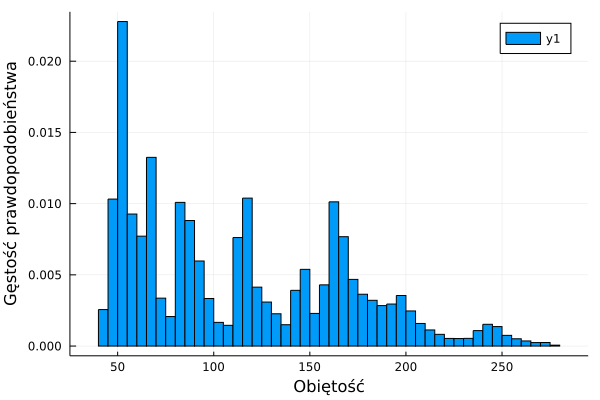

In [50]:
histogram(data_clean[:,:V], normalize=:pdf,ylab="Gęstość prawdopodobieństwa",xlab="Obiętość")

In [51]:
savefig("imgs/histogram_V.pdf");

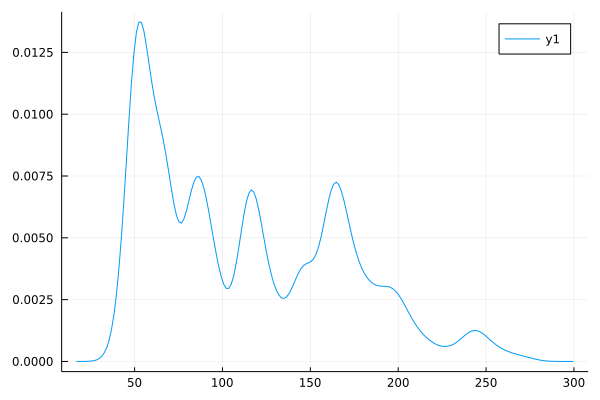

In [52]:
density(data_clean[:,:V])

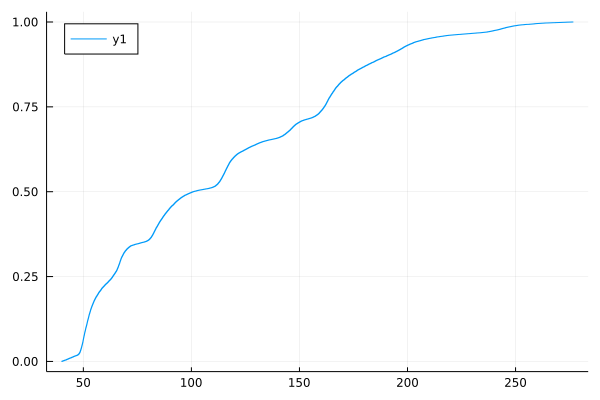

In [53]:
ecdfplot(data_clean[:,:V])

In [54]:
println("średnia: ",mean(data_clean[:,:V]),", mediana: ", median(data_clean[:,:V]),", wariancja:", var(data_clean[:,:V]), " skośność: ", skewness(data_clean[:,:V]), ", kurtoza: ",kurtosis(data_clean[:,:V]))

średnia: 113.4855821731845, mediana: 100.87383600000001, wariancja:3057.1020945912273 skośność: 0.5951805098544467, kurtoza: -0.6346662219519383


In [55]:
var(data_clean[:,:V])

3057.1020945912273

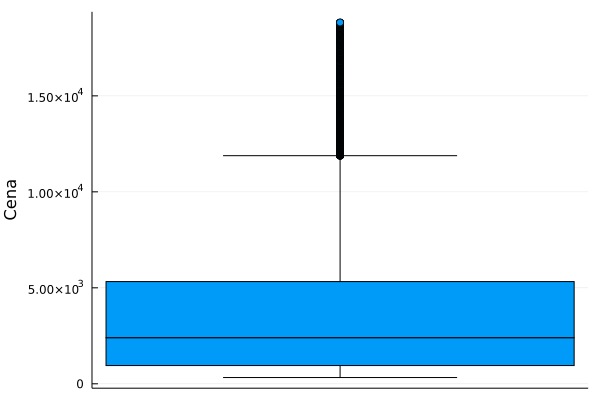

In [56]:
boxplot(data[:,:price], ylab = "Cena",xaxis=nothing,legend=false)

In [57]:
savefig("imgs/boxplot_price_danych.pdf");

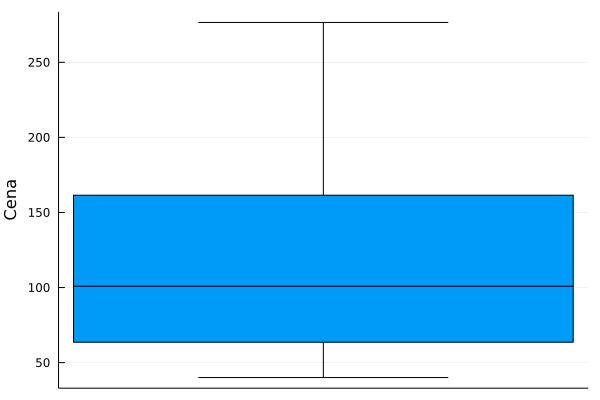

In [58]:
boxplot(data_clean[:,:V], ylab = "Cena",xaxis=nothing,legend=false)

In [59]:
savefig("imgs/boxplot_price_danych_oczyszczonych.pdf");

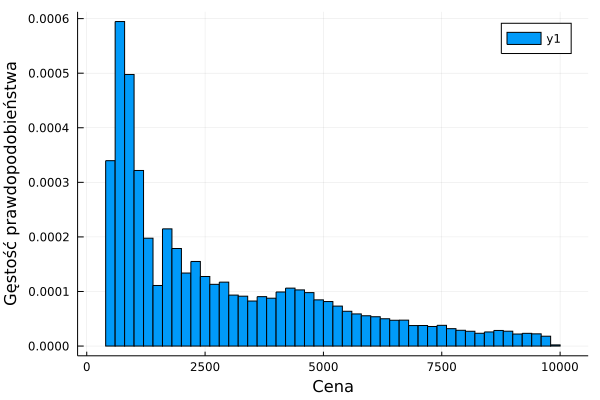

In [60]:
histogram(data_clean[:,:price], normalize=:pdf,ylab="Gęstość prawdopodobieństwa",xlab="Cena")

In [61]:
savefig("imgs/histogram_price.pdf");

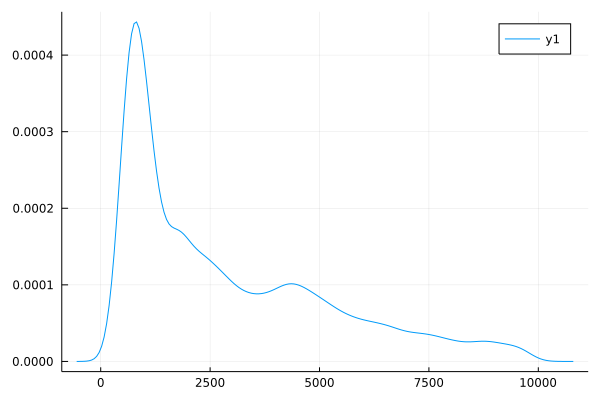

In [62]:
density(data_clean[:,:price])